In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import imageio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, MaxPooling2D, Conv2D
from tensorflow.keras import applications as app
from tensorflow.keras import optimizers, losses, activations, models

#from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

### Data pre-processing

In [2]:
data_generator = ImageDataGenerator(rescale=1/255)

In [3]:
%%time
train_generator = data_generator.flow_from_directory(
        directory='C:/breakhis/train',
        target_size=(150, 150),
        batch_size=11,
        class_mode='categorical',
        shuffle=True)

Found 5005 images belonging to 8 classes.
Wall time: 638 ms


In [4]:
test_generator = data_generator.flow_from_directory(
        directory='C:/breakhis/test',
        target_size=(150, 150),
        batch_size=11,
        class_mode='categorical',
        shuffle=True)

Found 2904 images belonging to 8 classes.


### Build Model3: Transfer learning (inception v3)

In [5]:
# We can change different transfer model in this line
base_incepv3_model = app.InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150,3))

W0918 17:04:53.861092 37928 deprecation.py:506] From C:\Users\alien\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model3 = Sequential()
model3.add(base_incepv3_model)


model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(8, activation='softmax'))

In [7]:
model3.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['accuracy'])

In [8]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1179712   
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
Total params: 22,983,016
Trainable params: 22,948,584
Non-trainable params: 34,432
_________________________________________________________________


In [9]:
%%time
history3 = model3.fit_generator(train_generator, steps_per_epoch=5005/11, 
                              validation_data=test_generator, validation_steps=2904/11, 
                              shuffle=True, epochs=20, verbose=True)

Epoch 1/20
455/455 [==============================] - 221s 486ms/step - loss: 1.6239 - acc: 0.4621 - val_loss: 1.9848 - val_acc: 0.3933
Epoch 2/20
455/455 [==============================] - 153s 337ms/step - loss: 1.3044 - acc: 0.5493 - val_loss: 1.8489 - val_acc: 0.4205
Epoch 3/20
455/455 [==============================] - 170s 373ms/step - loss: 1.0297 - acc: 0.6390 - val_loss: 1.8551 - val_acc: 0.4208
Epoch 4/20
455/455 [==============================] - 119s 263ms/step - loss: 0.8057 - acc: 0.7221 - val_loss: 2.0915 - val_acc: 0.4332
Epoch 5/20
455/455 [==============================] - 119s 261ms/step - loss: 0.6668 - acc: 0.7698 - val_loss: 2.2761 - val_acc: 0.4201
Epoch 6/20
455/455 [==============================] - 124s 273ms/step - loss: 0.5506 - acc: 0.8028 - val_loss: 2.3058 - val_acc: 0.4563
Epoch 7/20
455/455 [==============================] - 117s 257ms/step - loss: 0.4663 - acc: 0.8354 - val_loss: 2.4825 - val_acc: 0.4459
Epoch 8/20
455/455 [============================

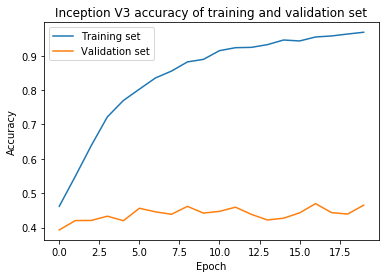

In [10]:
plt.plot(range(20), history3.history['acc'])
plt.plot(range(20), history3.history['val_acc'])
plt.title("Inception V3 accuracy of training and validation set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training set", "Validation set"])

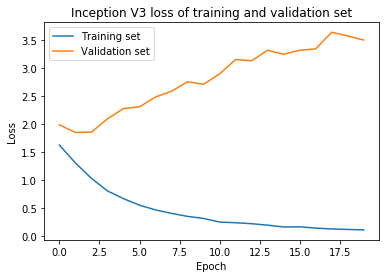

In [11]:
plt.plot(range(20), history3.history['loss'])
plt.plot(range(20), history3.history['val_loss'])
plt.title("Inception V3 loss of training and validation set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training set", "Validation set"])